### First task: Data Science intern at BiStartX
#### Week 1: Basic Data Analysis
* Project Title: Exploratory Data Analysis on a Sample Dataset
* Description: Perform EDA on a publicly available dataset (e.g., Titanic or Iris dataset). Analyze distributions, correlations, and missing values. Visualize key insights using graphs.
* Dataset Reference: Titanic Dataset


* **Definition**: **Exploratory Data Analysis (EDA)** is a critical step in the data analysis process. It involves examining and summarizing the main characteristics of a dataset, often using visual methods.


#### What I can do in EDA?

1. Importing important libraries
2. Importing dataset
3. Finding and handling duplicate records
4. Handling missing values
5. Encoding Categorical variables
6. Univariante Analysis
7. Multivariate Analysis
8. Handling Outliers
9. Conclusion

#### 1. import important libraries

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. importing data

In [19]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

* As we can see above, the data set has 12 columns or features and 891 rows. Each row has information about a passenger. So, in total, we have data of 891 passengers. We also have numerical and categorical features.

In [26]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### Dataset: The Titanic dataset consists of the following columns, Let me describe the Columns

1.	Survival: 0 = No, 1 = Yes
2.	Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	Sex: Sex
4.	Age: Age in years
5.	SibSp:  siblings/spouses aboard
6.	Parch:  parents/children aboard
7.	Ticket: Ticket number
8.	Fare: Passenger fare
9.	Cabin: Cabin number
10.	Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### From the dataset summary statistics, we can derive several insights related to passenger demographics, survival rates, and ticketing information. Here are some key observations:

##### a. Survival Rate Analysis
* The mean survival rate is 0.38 (38%), meaning 62% of passengers did not survive.

##### b. Passenger Class Distribution
* The mean Pclass is around 2.31, and the 50th percentile (median) is 3.

* This suggests more passengers traveled in third class, likely due to affordability.

* We can analyze survival rates across different classes to check if higher-class passengers had a higher chance of survival.

##### c. Age Distribution
* The average age is 29.7 years, with a standard deviation of 14.5 years.

* The youngest passenger is 0.42 years, and the oldest is 80 years.

* A deeper analysis can be done to check how age relates to survival.

##### d. Family Onboard
* Most passengers traveled alone, as the median values for both SibSp (siblings/spouses) and Parch (parents/children) are 0.

* The maximum number of siblings/spouses is 8, and the maximum number of parents/children is 6.

* We can investigate whether traveling with family affected survival chances.

##### e. Fare Price Variation
* The median fare is 14.45, but fares range from 0 to 512.33, indicating significant variation.

* The high standard deviation (49.69) suggests that some passengers paid much higher fares, likely in first-class cabins.

* We can explore if higher fares correlate with higher survival rates.

#### 3. Finding and Handling Duplicate values

In [47]:
df.duplicated().sum()

0

* We can notice that there is no duplicate values 

#### 4. Handling Missing Values

In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Missing Data
* 177 missing Age values → Possible imputation needed using median or mean.

* 687 missing Cabin details → Might indicate that many passengers in lower classes didn't have assigned cabins.

* 2 missing Embarkation details → Minimal impact, but we may need to fill missing values.      

In [3]:
(df.isnull().sum()/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Missing Data Overview
##### Age missing (19.87%):

* Since nearly 20% of Age values are missing, we need to handle this carefully.

##### Possible solutions:

* Mean imputation (if Age is normally distributed with no extreme outliers).

* Median imputation (if Age has skewness or outliers).

##### Cabin missing (77.1%):

* More than 77% missing means this feature is highly incomplete.

##### Possible actions:

* Drop the Cabin column (since it exceeds the 25% missing data rule).

##### Embarked missing (0.22%):

* Only 2 missing values, so it can be easily imputed.

* **Solution:** Fill with the most common value (mode).

In [20]:
#dropping cabin columns 
df.drop(columns= ['Cabin'],inplace=True)

<Axes: >

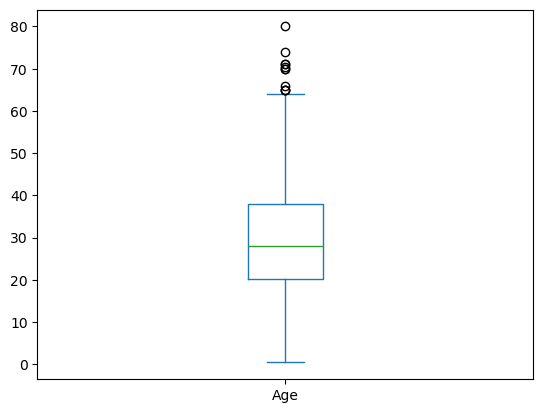

In [5]:
df['Age'].plot(kind = 'box')

In [21]:
# From the box plot we can verify there is outlier in the age column so imputing missing values for age will be the median of the Age column
df['Age'] = df['Age'].fillna(df['Age'].median())


In [5]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

* Since the Embarked column is categorical, replace the missing values with the most frequent category (mode), which is S.

In [22]:
#df['Embarked'].fillna('S', inplace=True)
df['Embarked'] = df['Embarked'].fillna('S')

#### 5. Encoding Categorical Variables
* Encoding categorical variables is a critical step in EDA for machine learning models, as most models require numerical input.
* There are two approach:
* **Label encoding** and **one-hot encoding**.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


* 'Name', 'Ticket', and 'PassengerId' column is not a big issue in our analysis so we can focus on the necessary Features only.

In [6]:
drop_list=['PassengerId','Name', 'Ticket']
df.drop(drop_list, axis = 1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


* Sex and Embarked are both object type, nominal features, we need to encode them to get the best
EDA from our data.

* Encoding categorical variables is a critical step in data preprocessing for machine learning models, as most models require numerical input.
* **Label Encoding** converts each category in a categorical variable to a unique integer.
* **One-Hot Encoding** converts categorical variables into a series of binary columns, each representing a unique category.
##### When to Use One-Hot Encoding
* When the categorical variable is nominal (no intrinsic order).
* When you want to avoid introducing ordinal relationships.

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

# Define nominal features
nominal_features = ['Sex', 'Embarked']

# Create a transformer for one-hot encoding categorical columns
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), df.select_dtypes(include=['object']).columns.tolist()),
    verbose_feature_names_out=False
)

# Apply transformation
data_encoded = transformer.fit_transform(df)
data = pd.DataFrame(data_encoded, columns=transformer.get_feature_names_out())

# Drop original nominal columns and concatenate the encoded data
df.drop(columns=nominal_features, inplace=True)
df = pd.concat([df, data], axis=1)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    float64
 7   Sex_male    891 non-null    float64
 8   Embarked_C  891 non-null    float64
 9   Embarked_Q  891 non-null    float64
 10  Embarked_S  891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 76.7 KB


In [92]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


* We have removed unnecessary columns, handled missing data, and encoded the categorical variables. Next, let's focus on the 'Survived' column.

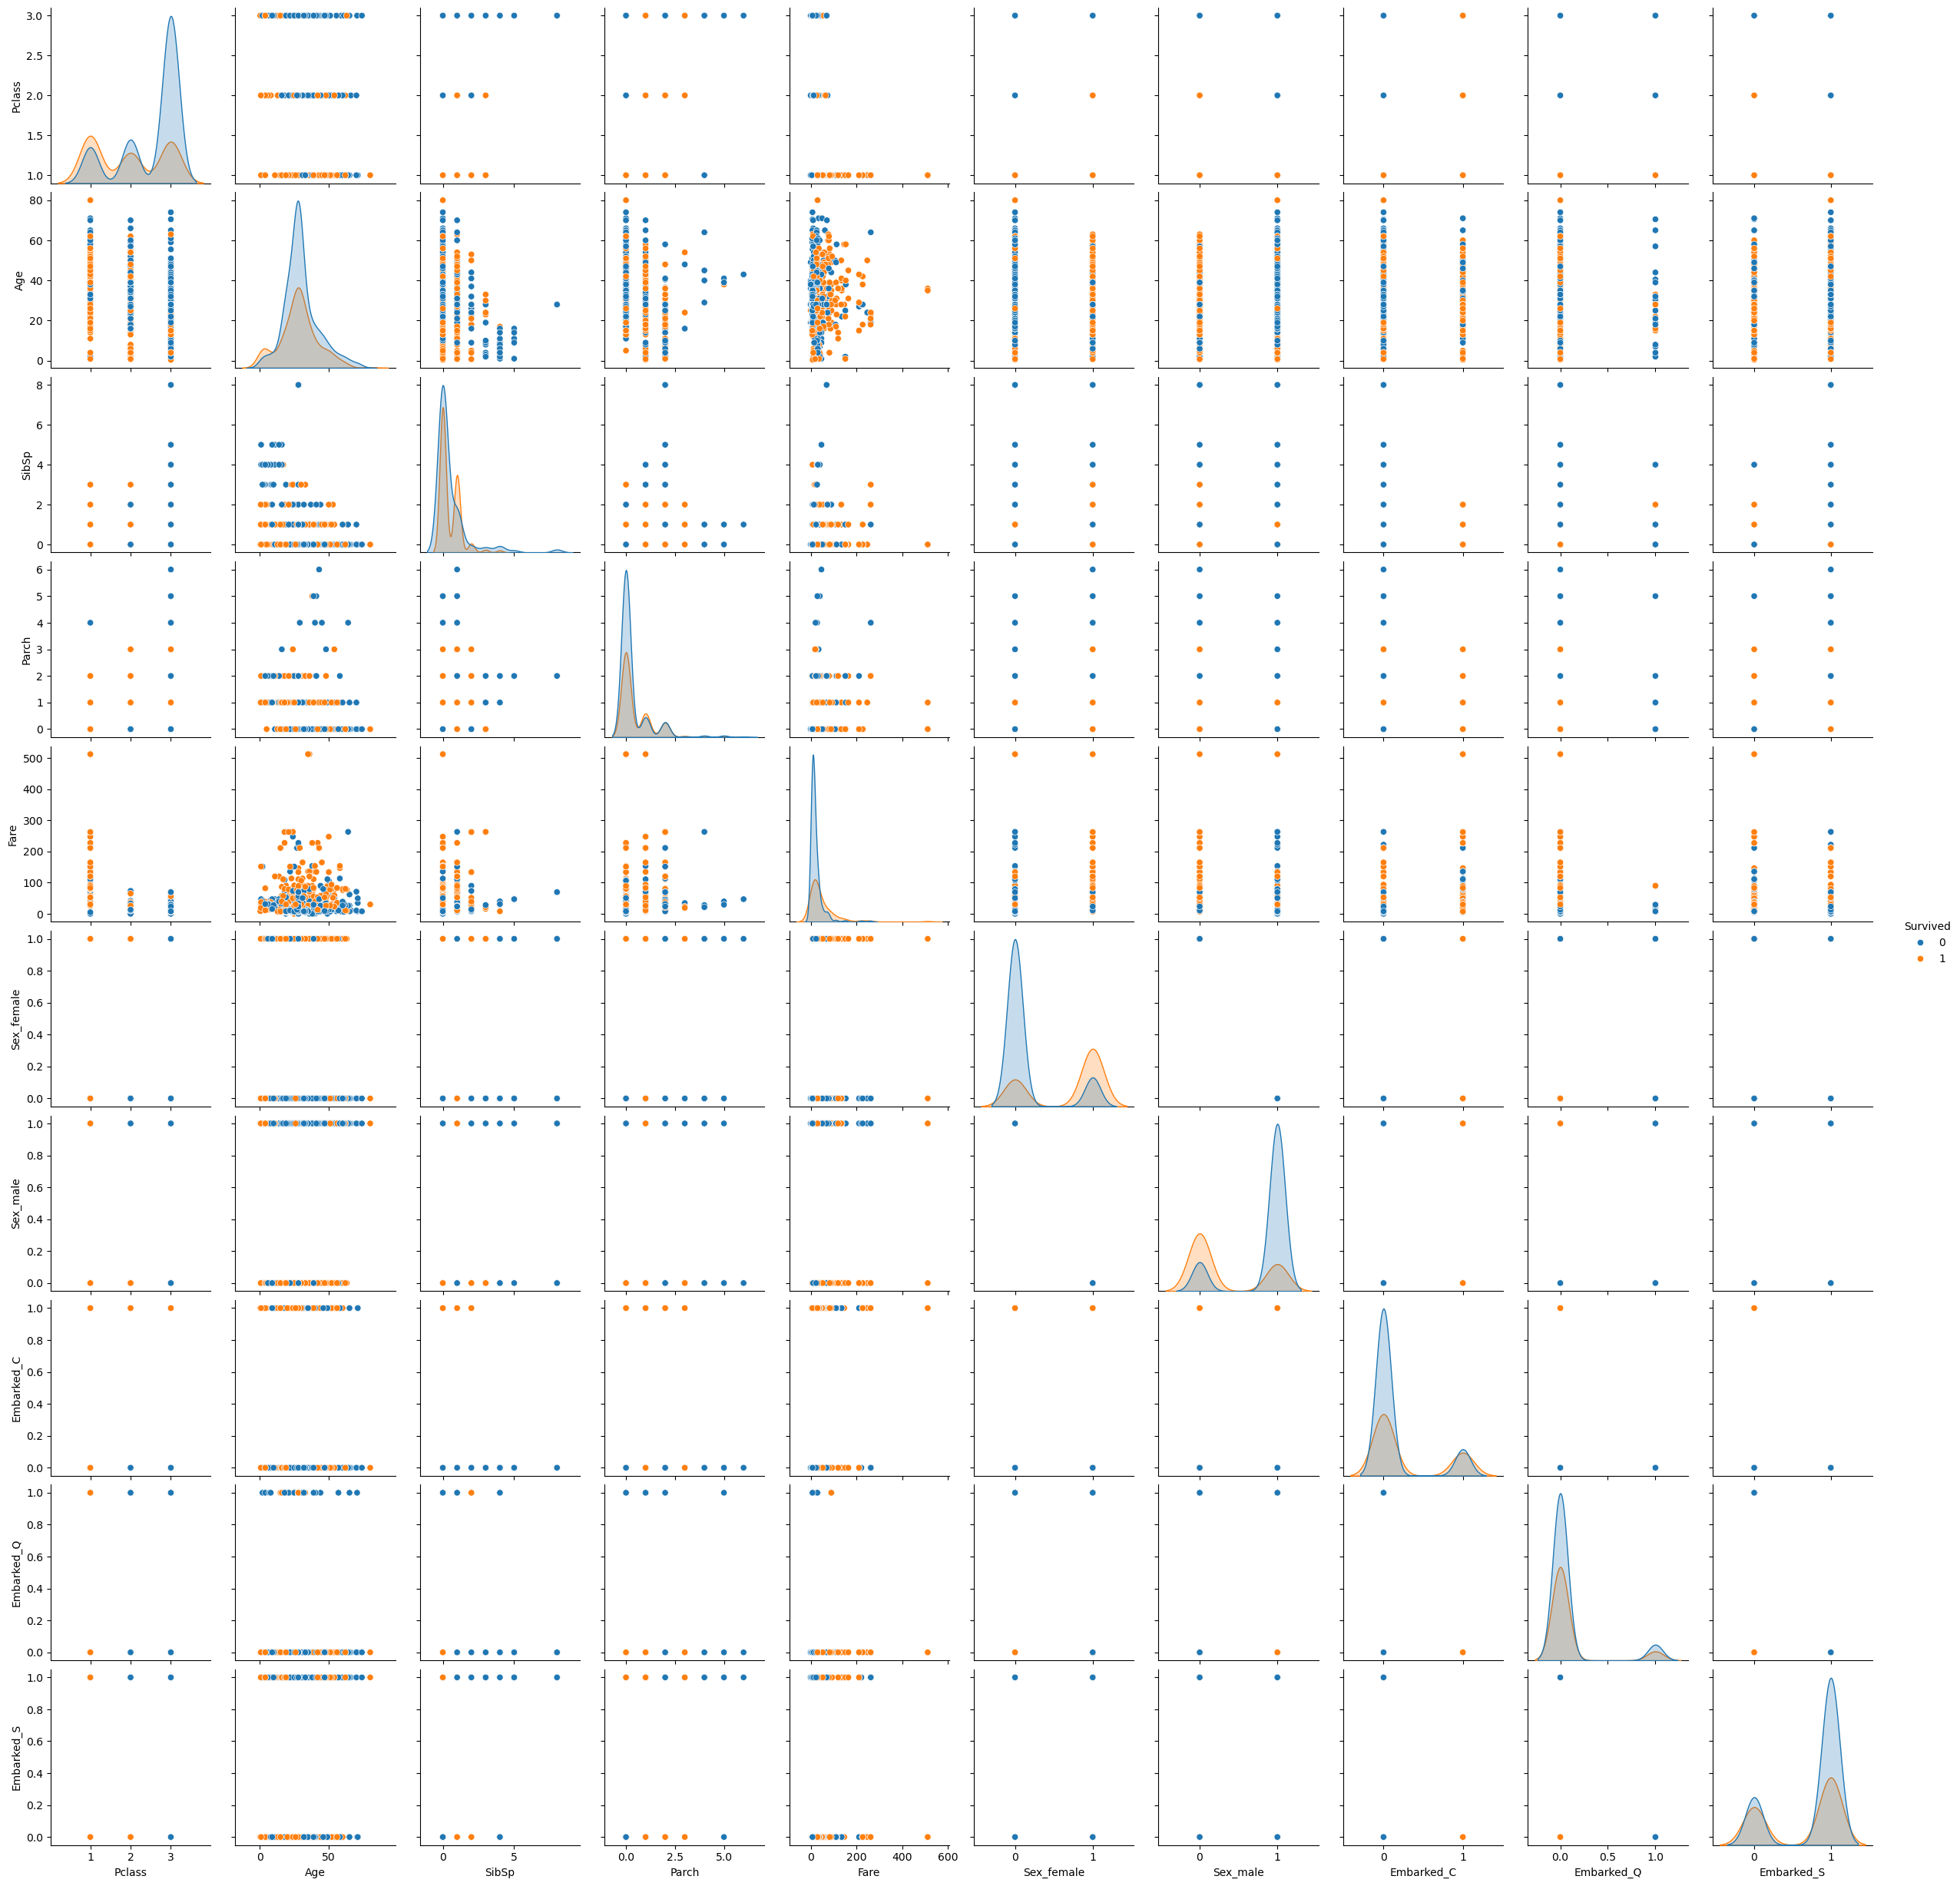

In [59]:
# Plot pairplot first
sns.pairplot(df, hue="Survived")

* The picture is not very clear with pair plots so let’s go towards heatmap analysis to understand what exactly is happening.

<Axes: >

<Figure size 1500x500 with 0 Axes>

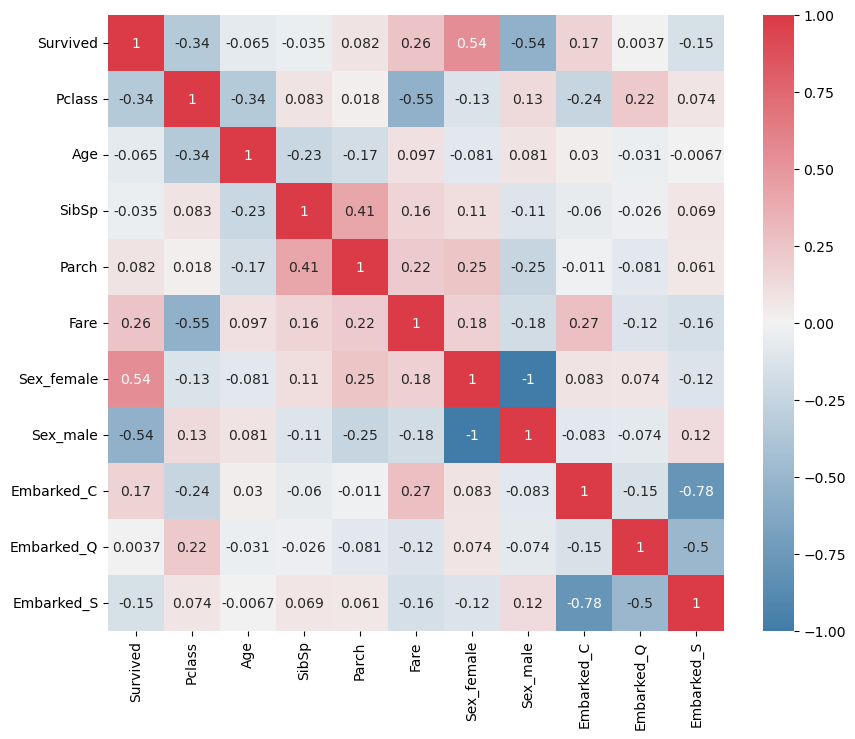

In [11]:
plt.figure(figsize = (15,5))
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10,as_cmap=True),
square=True, ax=ax, annot=True)

In [12]:
df.corr()['Survived'].sort_values(ascending= False)

Survived      1.000000
Sex_female    0.543351
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64

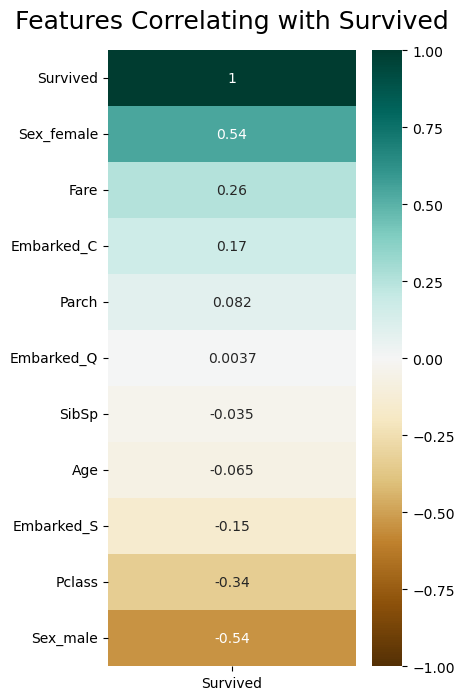

In [13]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df.corr(numeric_only=True)[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);

* The heatmap above clearly shows that certain features are positively correlated with survival. In descending order, being female, paying a higher fare, embarking from Cherbourg, having parents or children onboard (Parch), and embarking from Queenstown all increase the chances of survival. This indicates a direct proportionality with the 'Survived' column.  

* Conversely, features such as having siblings or a spouse onboard (SibSp), older age, embarking from Southampton, being in a lower passenger class (Pclass), and being male are negatively correlated with survival. This means that as these factors increase, the likelihood of survival decreases.  

##### Specifically:  
- **Age**: Younger passengers had a higher survival rate.  
- **Sex (Male)**: Women had a better chance of survival than men.  
- **SibSp**: Those traveling with siblings or a spouse had a lower survival rate.  
- **Embarked from Southampton**: Passengers who boarded from Southampton had a lower survival rate compared to those from the other two locations.  
- **Pclass**: Passengers in third class had the lowest chance of survival, while those in first class had the highest.  

* In summary, priority for lifeboats was given to upper-class passengers, women, younger children, those who paid higher fares, those who embarked from Cherbourg, and those traveling with parents or children (Parch)."

### 6. Univariate Analysis

##### 6.1. Survived column

C:\Users\smith\AppData\Local\Temp\ipykernel_13800\3510046257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survived', kind="count", palette="Dark2", data=df)


Survived
0    549
1    342
Name: count, dtype: int64


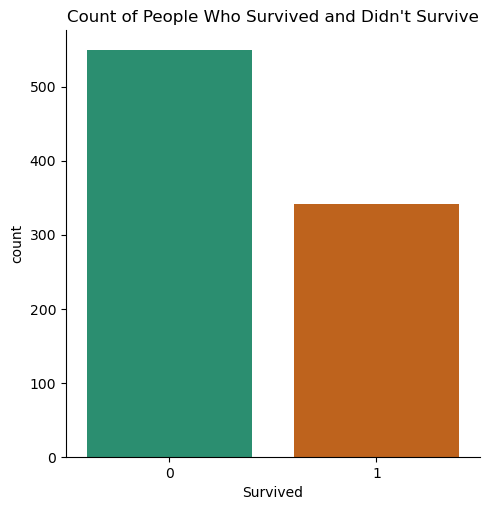

In [14]:
# Now to check how many passengers survived and how many didn't. I am using a count plot that counts the
sns.catplot(x='Survived', kind="count", palette="Dark2", data=df)
plt.title("Count of People Who Survived and Didn't Survive")

# Print the counts for the 'Survived' column
print(df['Survived'].value_counts())


* In the 'Survived' column, 1 indicates that the passenger survived, while 0 means they did not. The analysis reveals that the majority of passengers did not survive. Out of a total of 891 passengers, 549 did not survive, while 342 managed to survive.

##### 6.2. Sex column

In [15]:
# data will be used for plotting
data= pd.read_csv("Titanic-Dataset.csv")

C:\Users\smith\AppData\Local\Temp\ipykernel_13800\3651191615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Sex", kind="count", palette="Dark2", data=data)


Sex
male      577
female    314
Name: count, dtype: int64


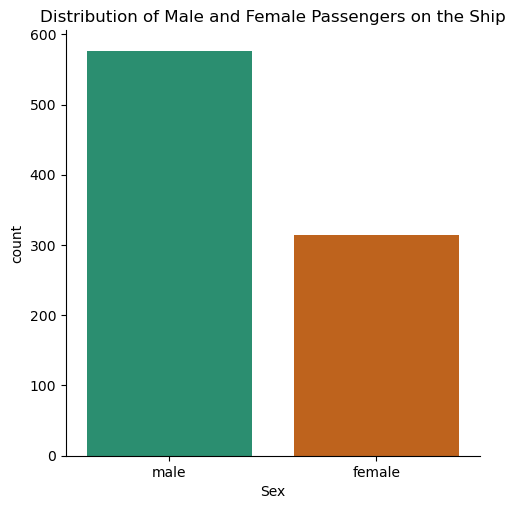

In [16]:
# Investigating the Sex column
sns.catplot(x="Sex", kind="count", palette="Dark2", data=data)
plt.title("Distribution of Male and Female Passengers on the Ship")

# Display the count of each gender
print(data['Sex'].value_counts())


* there were more male passengers on the ship than female.

Text(0.5, 1.0, 'Survival rate based on Gender')

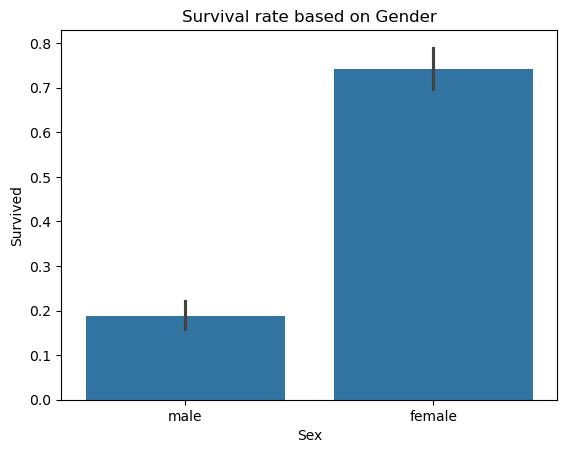

In [17]:
sns.barplot(data=data, x='Sex', y='Survived')
plt.title("Survival rate based on Gender")

* The bar plot further validates our analysis, showing that more females survived compared to males.

In [22]:
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

##### i. Males had a much lower survival rate than females:

* 468 males did not survive, while only 109 survived.

* 233 females survived, while only 81 did not.

* The number of surviving males is significantly lower than the number of not survived males.

##### ii. Females had a higher survival rate than males:

* More than 74% of females (233 out of 314) survived.

* Only 18.9% of males (109 out of 577) survived.

* This suggests that women had a much higher chance of survival compared to men.

##### 6.3. Fare column 

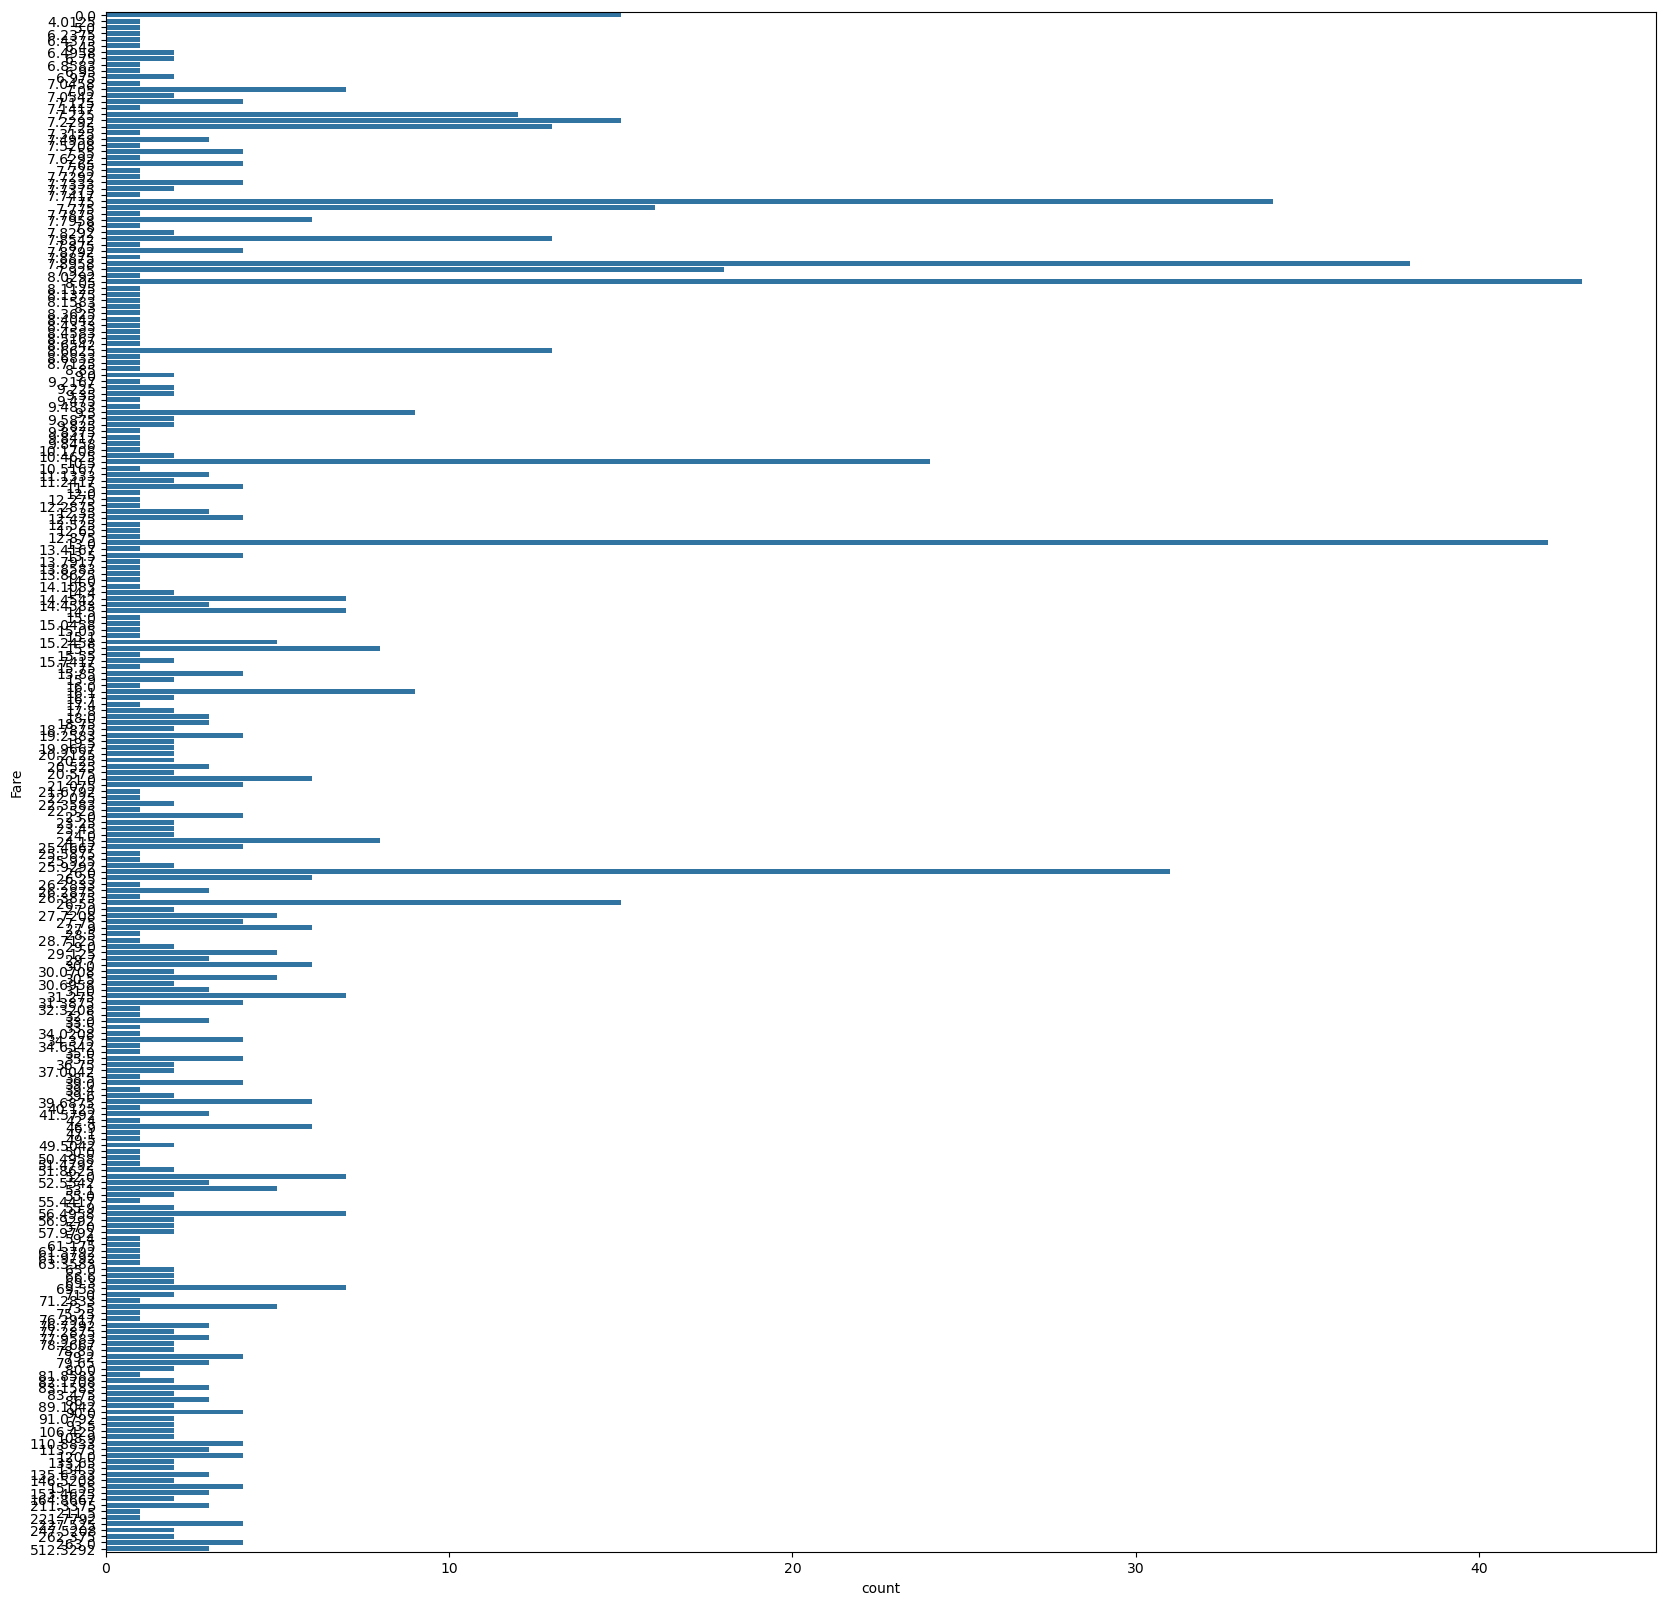

In [69]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=data['Fare'], data=data);

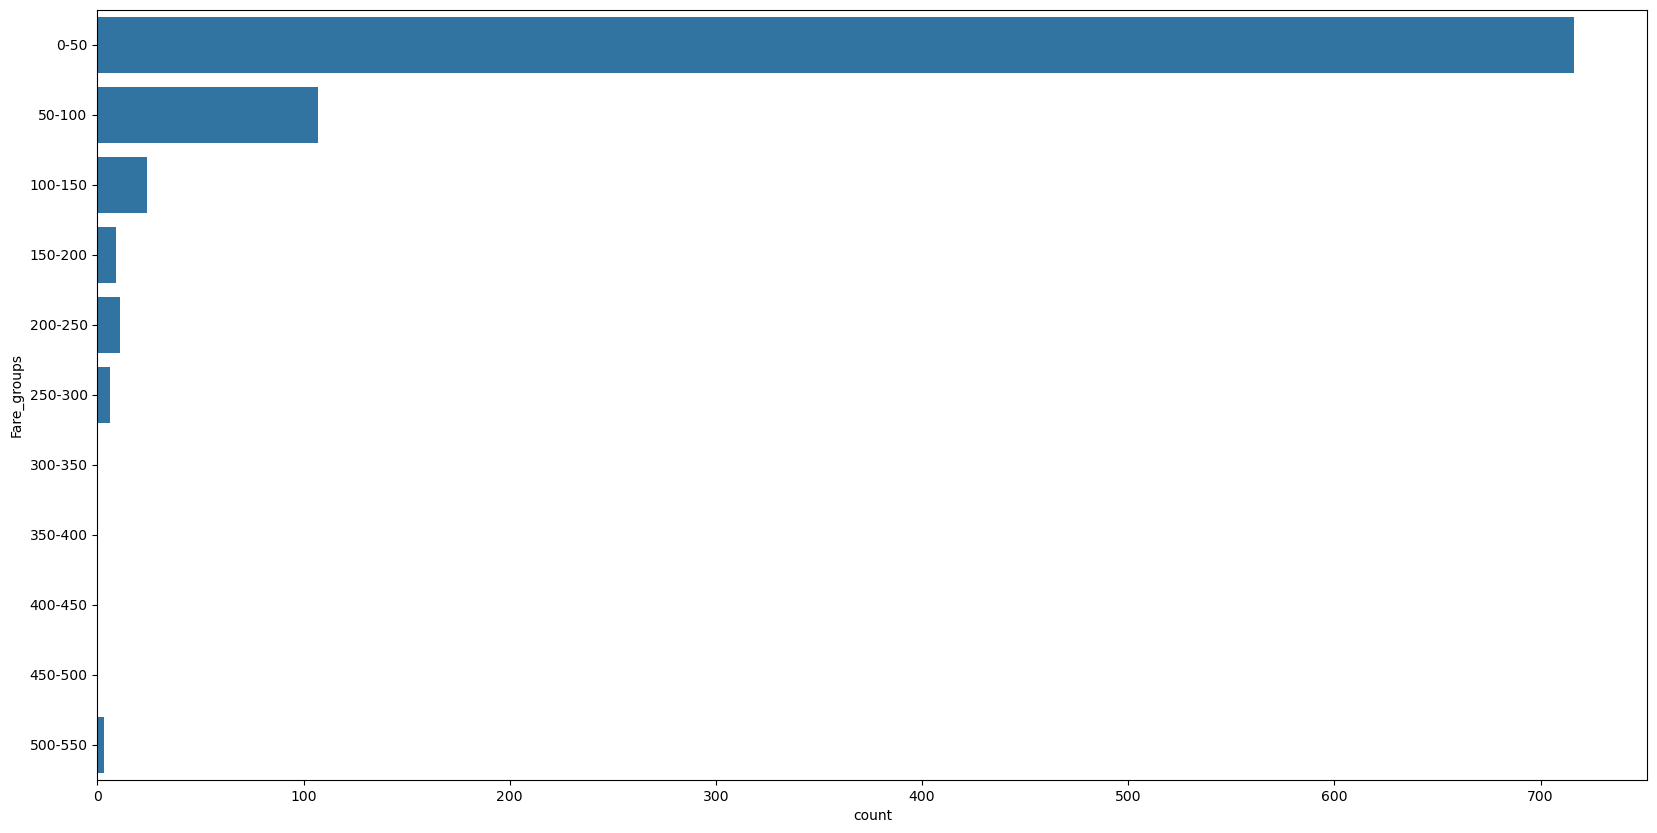

In [18]:
data['Fare_groups'] = pd.cut(data['Fare'],[0,50,100,150,200,250,300,350,400,450, 500, 550],labels=['0-50','50-100','100-150','150-200','200-250','250-300',
'300-350','350-400','400-450','450-500','500-550'])
fig = plt.figure(figsize=(20,10))
sns.countplot(y=data['Fare_groups'], data=data);

* The analysis indicates that the majority of passengers purchased the cheapest tickets, while only a few obtained the most expensive ones.

Text(0.5, 1.0, 'Survival rate based on Fare paid')

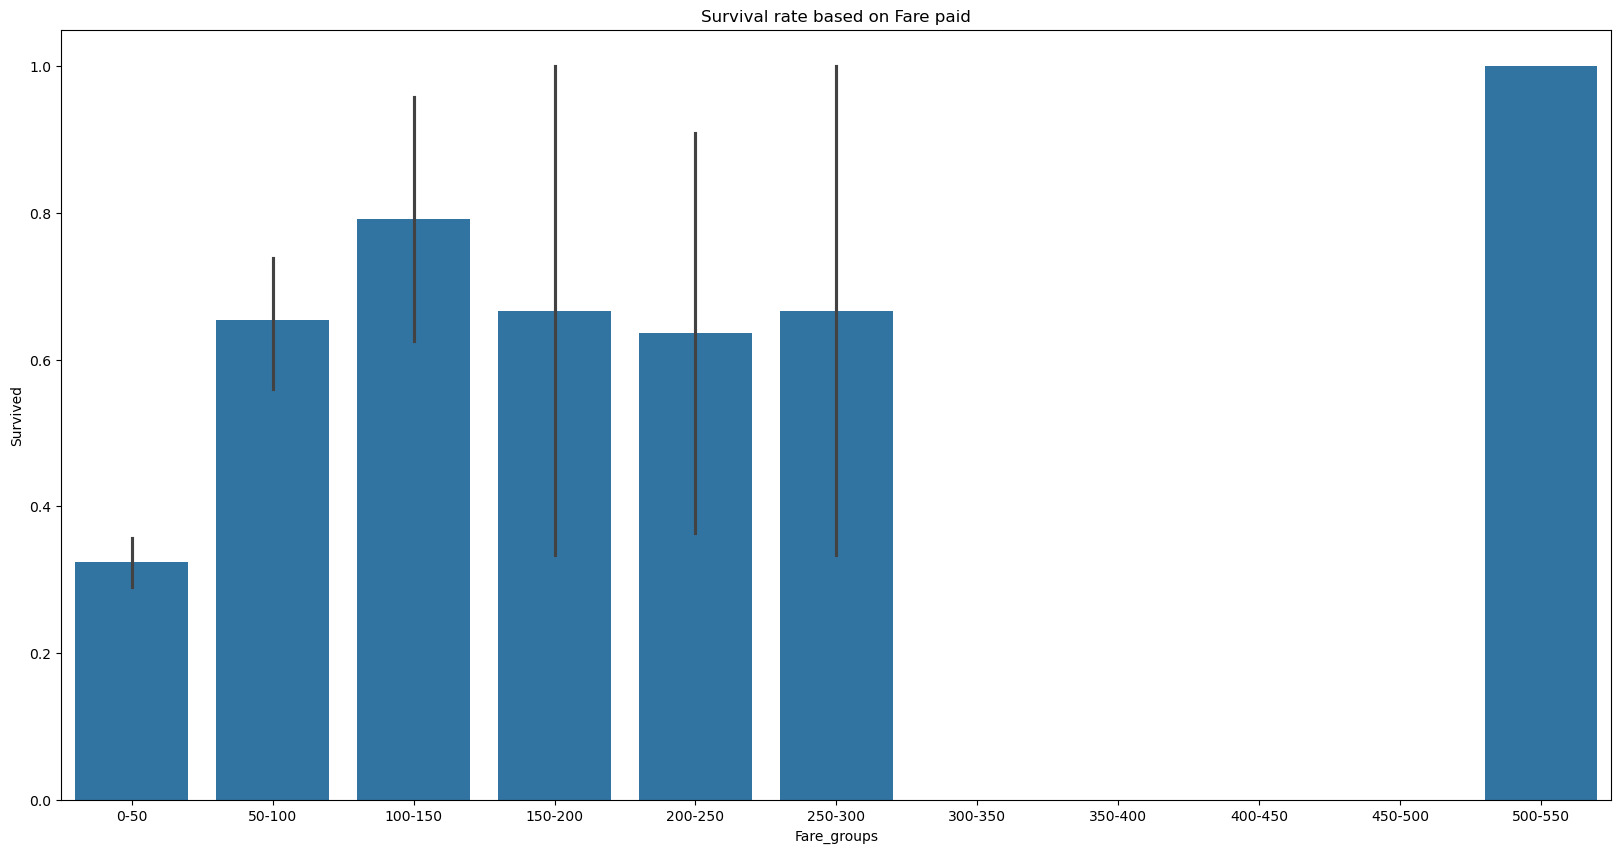

In [19]:
# we can see impact of Fare on survival rate.
fig = plt.figure(figsize=(20,10))
sns.barplot(data=data, x='Fare_groups', y='Survived')
plt.title("Survival rate based on Fare paid")

* As previously established, passengers who paid the highest fares ($500-$550) had the highest survival rates, as they were given priority on lifeboats. In contrast, those who paid the lowest fares ($0-$50) had the lowest survival rates.

##### 6.4. Pclass column

Text(0.5, 1.0, 'Survival rate based on Sibling/Spouse Feature')

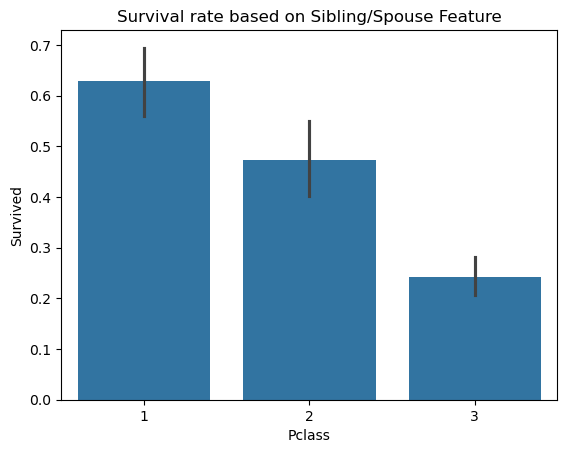

In [21]:
sns.barplot(data=data, x='Pclass', y='Survived')
plt.title("Survival rate based on Sibling/Spouse Feature")

* passengers who had tickets for an upper-class (first class), had higher chances of survival. Passengers in third class (Pclass = 3) had the lowest survival rates.

In [22]:
# Pclass column analysis  
pclass_counts = data['Pclass'].value_counts(normalize=True) * 100  
print(pclass_counts)  


Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


##### i. Most passengers were in Third Class (Pclass 3):

* 55.1% of passengers belonged to Pclass 3, making it the largest group.

* This indicates that a majority of passengers were likely lower-income individuals.

##### ii. First Class had the second-highest proportion:

* 24.2% of passengers were in Pclass 1.

* First-class passengers were typically wealthy individuals.

##### iii. Second Class had the least representation:

* 20.65% of passengers were in Pclass 2, forming the smallest group.

* This suggests that the middle-class group was relatively smaller compared to the lower and upper classes.

##### 6.5. Age column

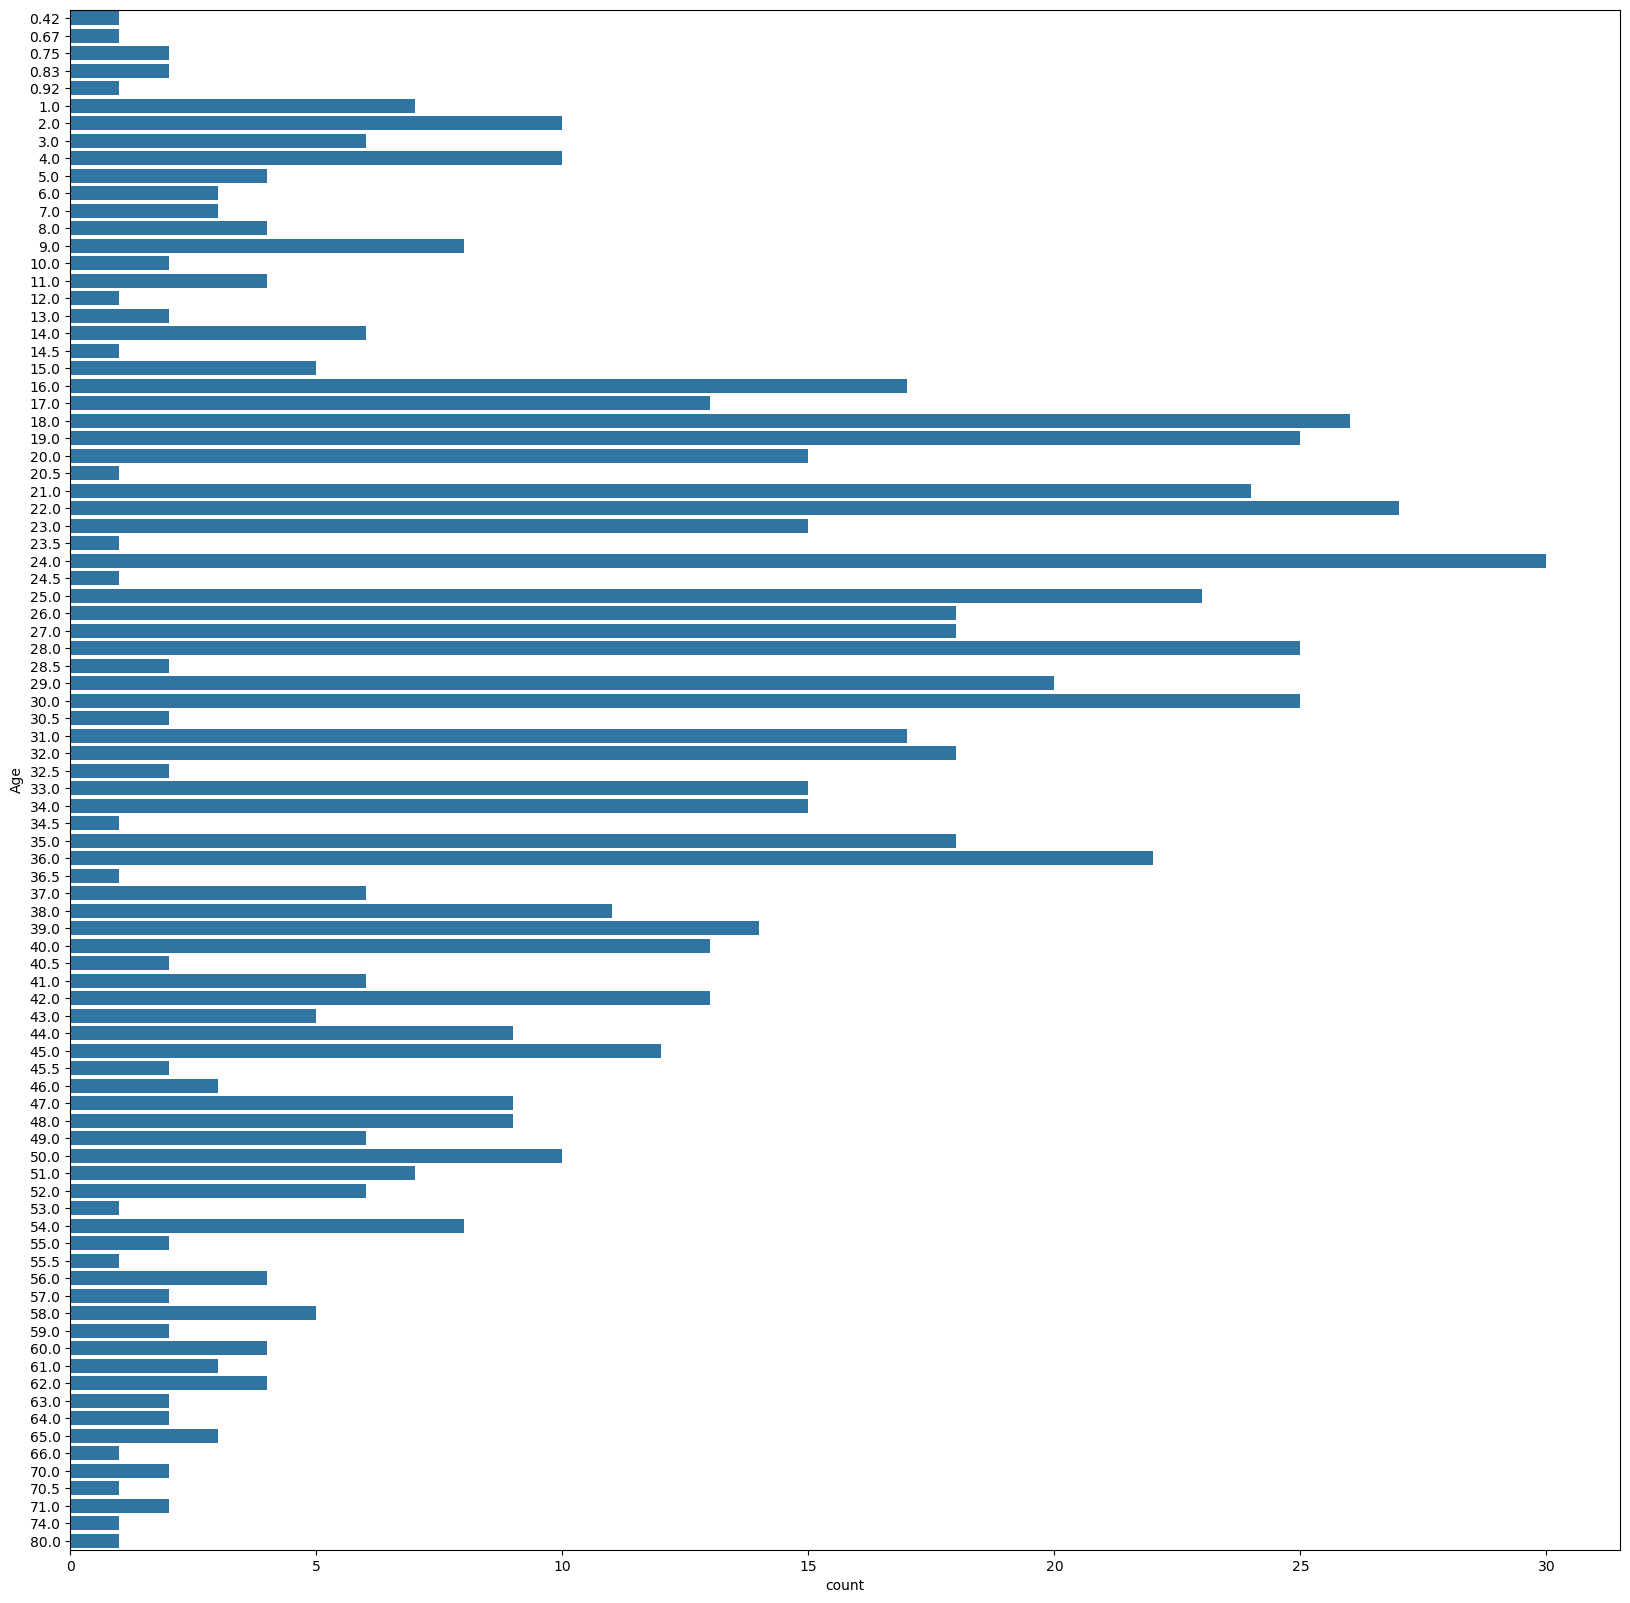

In [23]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=data['Age'], data=df);

* Lets divide them into 8 subgroups because it has many entries


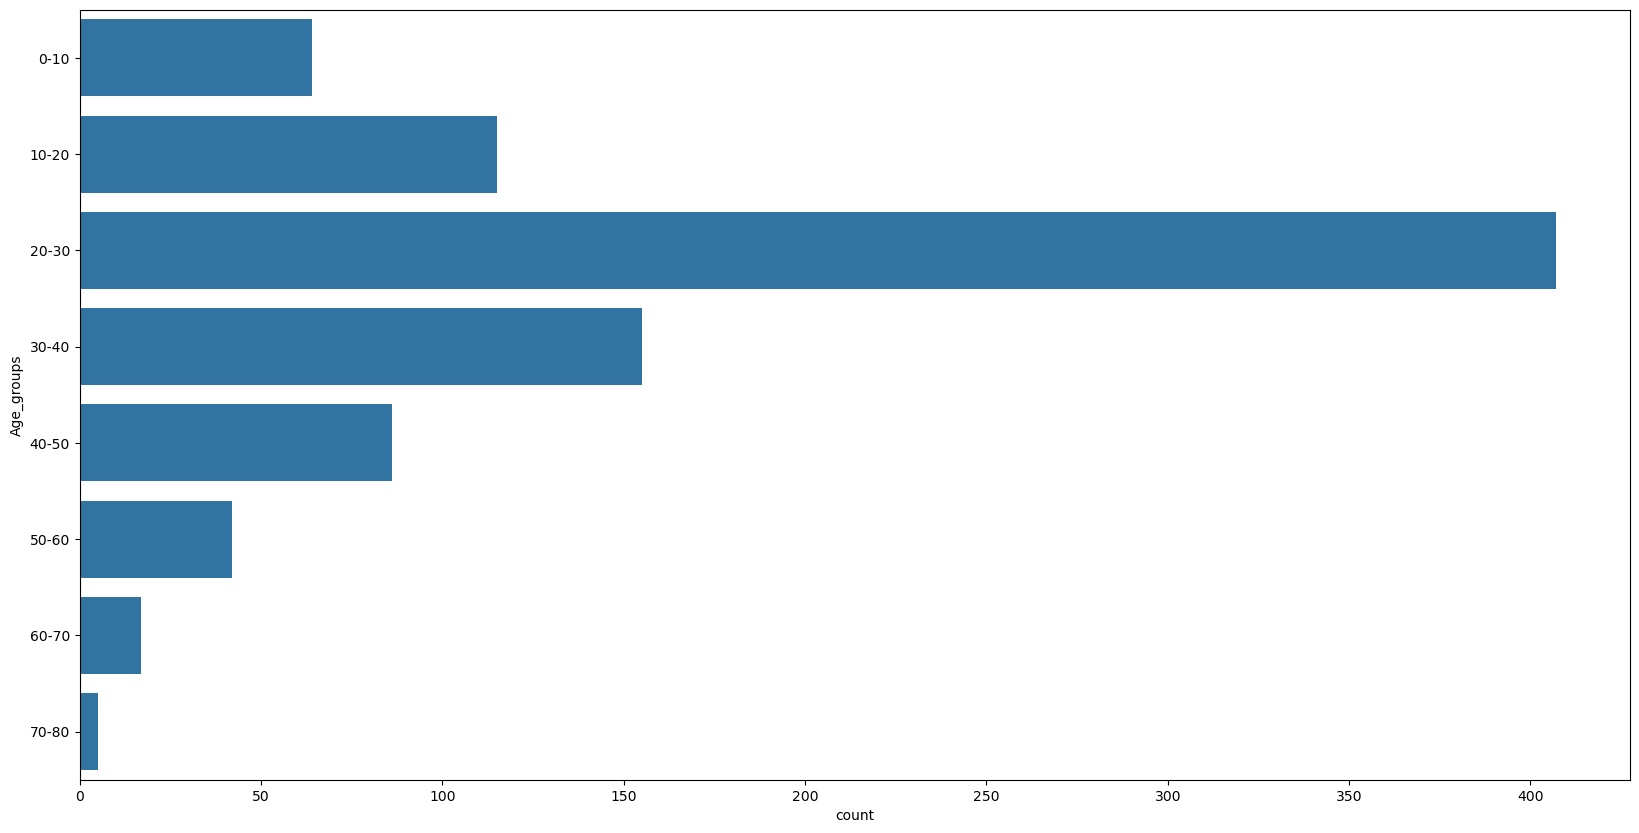

In [38]:
df['Age_groups'] = pd.cut(df['Age'], [0,10,20,30,40,50,60,70,80],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])
fig = plt.figure(figsize=(20,10))
sns.countplot(y=df['Age_groups'], data=df);

* The analysis shows that the majority of passengers were in the 20-30 age group, while the fewest passengers were in the 70-80 age bracket.

In [39]:
# some part of the analysis
print("People with age in between 60 and 70 are", df[(df['Age'] >= 60) & (df['Age'] <= 70)].shape[0])  
print("People with age greater than 70 and 75 are", df[(df['Age'] > 70) & (df['Age'] <= 75)].shape[0])  
print("People with age greater than 75 are", df[df['Age'] > 75].shape[0])  

print(': ' * 50)  

print("People with age between 0 and 1 are", df[df['Age'] < 1].shape[0])
print("People with age in between 1 and 60 are", df[(df['Age'] >= 1) & (df['Age'] < 60)].shape[0])

People with age in between 60 and 70 are 21
People with age greater than 70 and 75 are 4
People with age greater than 75 are 1
: : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : : 
People with age between 0 and 1 are 7
People with age in between 1 and 60 are 858


##### i. Few elderly passengers (60+ years old):

* Only 21 passengers were between 60 and 70 years old.

* Only 4 passengers were between 70 and 75 years old.

* Only 1 passenger was older than 75 years.

* This indicates that elderly passengers were a small minority on the Titanic.

##### ii. Few infants (below 1 year old):

* Only 7 passengers were younger than 1 year old.

* This suggests that there were very few infants on board, likely traveling with families.

Text(0.5, 1.0, 'Survival rate based on Age of Passengers')

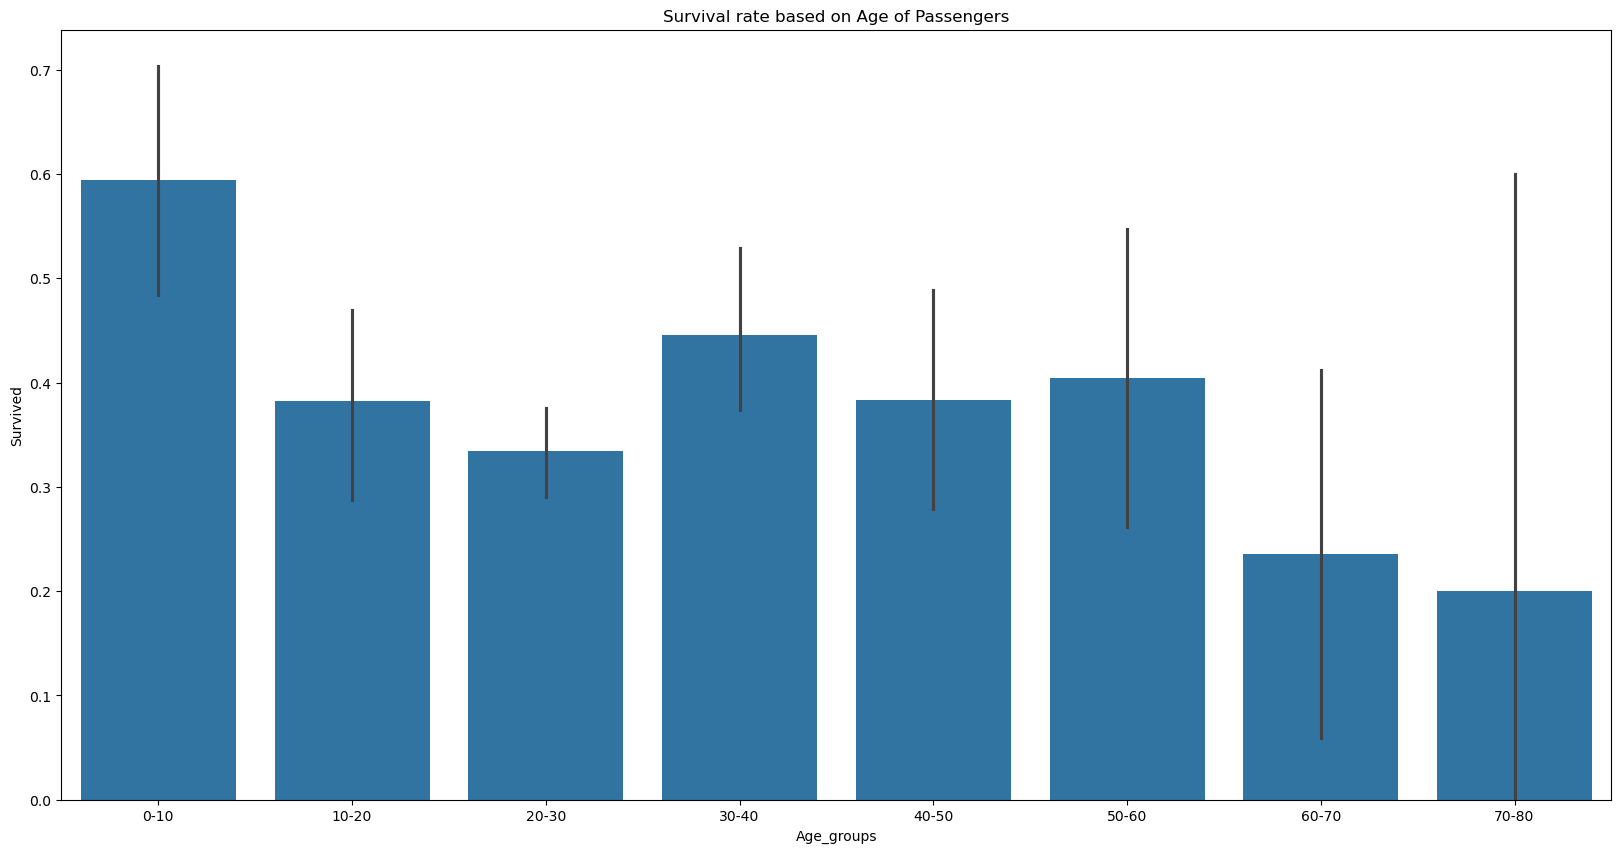

In [40]:
# let's see impact of Age on survival rate.
fig = plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Age_groups', y='Survived')
plt.title("Survival rate based on Age of Passengers")

* The youngest passengers (aged 0-10) had the highest survival rate, while the oldest passengers (aged 70-80) had the lowest survival rate. This suggests that children may be given priority on the lifeboats.

##### 6.6. Embarked column

C:\Users\smith\AppData\Local\Temp\ipykernel_13800\395950641.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Embarked", kind="count", palette="Dark2", data=df)


Text(0.5, 1.0, 'Count of people embarking from different towns')

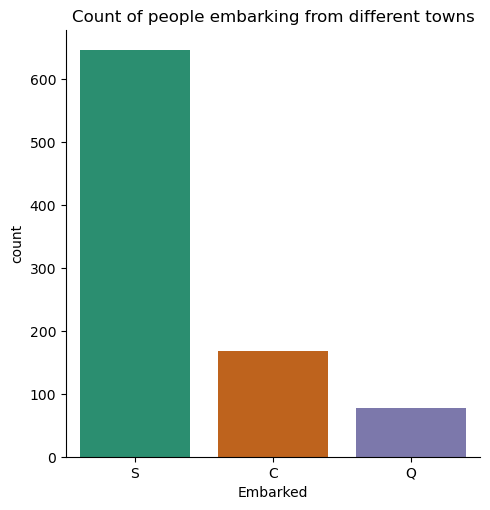

In [36]:
sns.catplot(x="Embarked", kind="count", palette="Dark2", data=df)
plt.title("Count of people embarking from different towns")

* From the graph, we can easily deduce that the majority of passengers embarked from Southampton, while the fewest passengers boarded from Queenstown.

Text(0.5, 1.0, 'Survival rate based on Embarked Town')

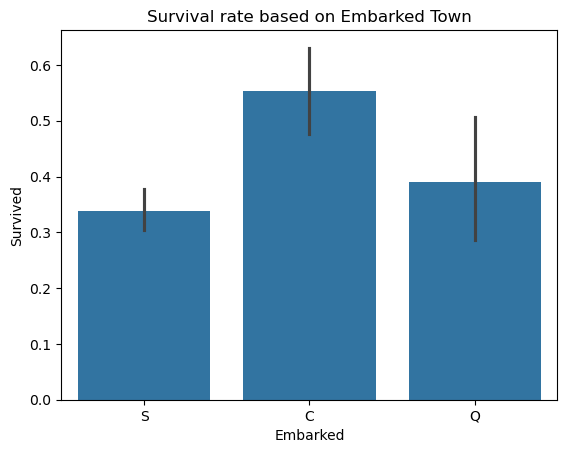

In [37]:
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title("Survival rate based on Embarked Town")

* Passengers who embarked from Cherbourg had the highest survival rate, while those who embarked from Southampton had the lowest. As we established from the Fare column analysis, the majority of passengers purchased the cheapest tickets.
* This suggests that passengers who boarded the ship from Southampton paid the lowest fares, and as a result, had the lowest survival rates.

##### 6.7. Parch column

C:\Users\smith\AppData\Local\Temp\ipykernel_13800\1287035084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Parch", kind="count", palette="Dark2", data=df)


Text(0.5, 1.0, 'Count of people with Parents or Children Onboard')

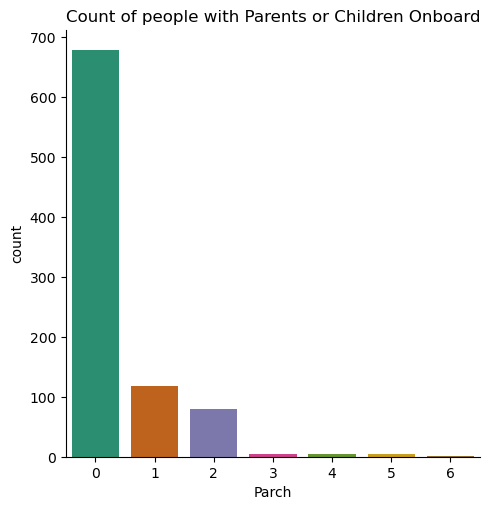

In [41]:
# Parch column investigation in depth:
sns.catplot(x="Parch", kind="count", palette="Dark2", data=df)
plt.title("Count of people with Parents or Children Onboard")

* The majority of passengers did not have any children or parents with them onboard.

In [42]:
print(data['Parch'].value_counts()) 

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


* i. Most passengers were alone: The majority of passengers (678 out of 891) did not have parents or children aboard, as indicated by the value 0.

* ii. Smaller family sizes: A significant portion of passengers (118) had one parent or child aboard, and 80 had two.

* iii. Larger families were rare: Only a few passengers had larger families aboard, with 5 having 5 parents or children, 5 having 3, 4 having 4, and just 1 passenger having 6 parents or children.

Text(0.5, 1.0, 'Survival rate of passengers based on Parent/Children Feature')

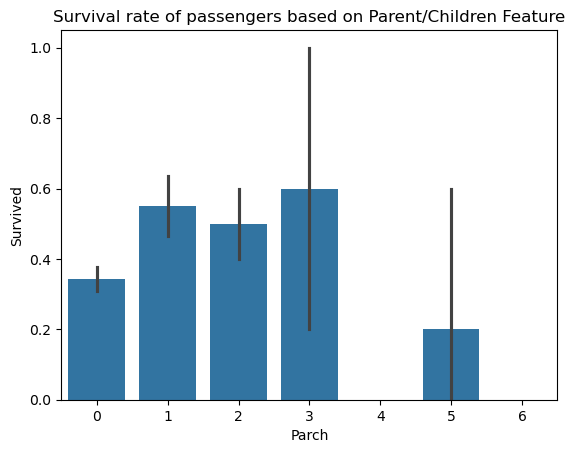

In [43]:
# Now to study survival rate of people with Parent/children.
sns.barplot(data=df, x='Parch', y='Survived')
plt.title("Survival rate of passengers based on Parent/Children Feature")

* We can summarize a trend: passengers who had parents or children with them had a higher chance of survival. However, the case where Parch = 5 does not follow this trend may be they are aged(70 - 80) or they all from Southampton, or all paid the lowest fare.

##### 6.8. SibSp column

C:\Users\smith\AppData\Local\Temp\ipykernel_13800\4228867856.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="SibSp", kind="count", palette="Dark2", data=df)


Text(0.5, 1.0, 'Count of people with Sibling/s or Spouse Onboard')

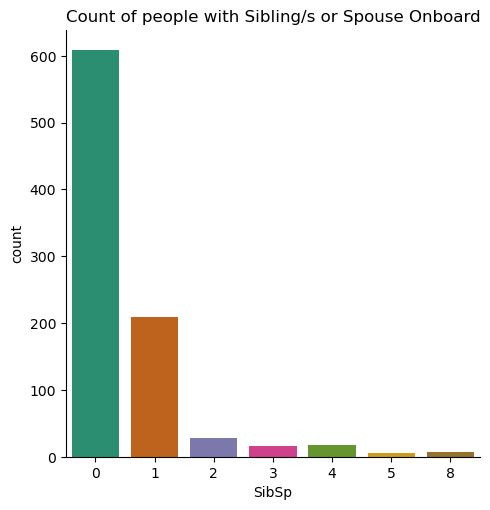

In [44]:
sns.catplot(x="SibSp", kind="count", palette="Dark2", data=df)
plt.title("Count of people with Sibling/s or Spouse Onboard")

* Most passengers boarding the Titanic did not have any siblings or spouses with them onboard.

In [45]:
print(data['SibSp'].value_counts()) 

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


##### i. Most passengers traveled alone (SibSp = 0):

* 608 passengers (majority) had no siblings or spouses on board.

* This suggests that many passengers were solo travelers.

##### ii. A significant portion had one family member (SibSp = 1):

* 209 passengers had exactly one sibling or spouse.

* This indicates that many passengers traveled as couples or with a single sibling.

##### iii. Larger families were rare:

* Only 28 passengers had 2 family members.

* Very few passengers (less than 20 each) had 3, 4, 5, or 8 family members.

* Having 8 siblings or spouses (only 7 passengers) was extremely uncommon.


Text(0.5, 1.0, 'Survival rate based on Sibling/Spouse Feature')

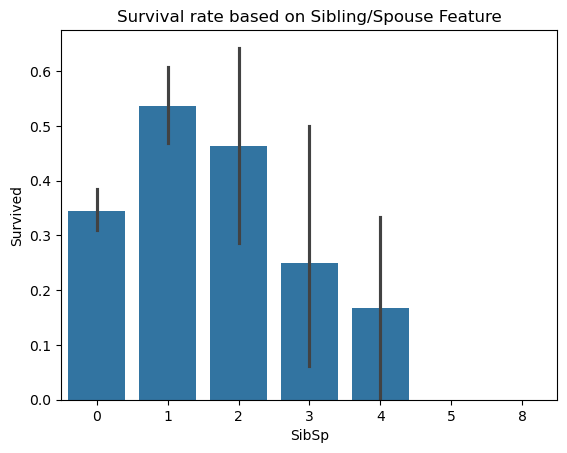

In [46]:
# Now to study survival rate of passengers with Siblings/Spouse 
sns.barplot(data=df, x='SibSp', y='Survived')
plt.title("Survival rate based on Sibling/Spouse Feature")

* The more siblings or spouses a passenger had, the lower their chances of survival.

### 7. Multivariate Analysis 
#### 7.1. Survival with Pclass

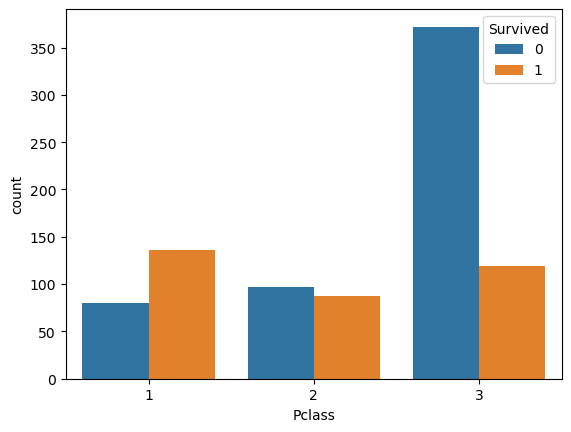

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [47]:
sns.countplot(x='Pclass', hue='Survived', data=df)  
plt.show()  

# Cross-tabulation for Pclass  
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1) 

##### a. First Class (Pclass = 1):

* 63% of First-Class passengers survived, which is the highest survival rate.

* This suggests that First-Class passengers had the best chance of survival, likely due to priority access to lifeboats and better accommodations.

##### b. Second Class (Pclass = 2):

* 47.3% of Second-Class passengers survived, which is lower than First Class but still a relatively good survival rate.

* Second-Class passengers had less priority compared to First Class but still had a better chance of survival than those in Third Class.

##### c. Third Class (Pclass = 3):

* 24.2% of Third-Class passengers survived, which is the lowest survival rate.

* This indicates that Third-Class passengers had the poorest chance of survival, likely due to being in the lower decks, further away from lifeboats, and less likely to be prioritized during the evacuation.

#### 7.2. Survival with Sex 

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


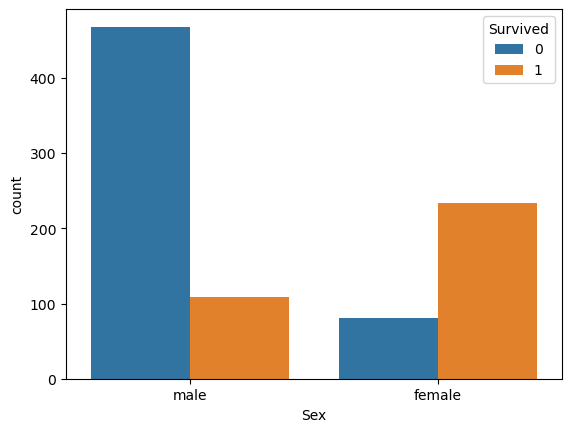

In [48]:
sns.countplot(x='Sex', hue='Survived',data=df)  
# plt.show()  

# Cross-tabulation for Sex  
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)

##### a. Female passengers:

* 74.2% of female passengers survived, which is significantly higher than the male survival rate.

* This strongly suggests that women had a higher chance of survival, likely due to the "women and children first" policy and their prioritized access to lifeboats.

##### b. Male passengers:

* Only 18.9% of male passengers survived.

* This indicates that men had a much lower chance of survival compared to women, reflecting the fact that men were often the last to be evacuated, and many did not make it onto lifeboats.


#### 7.3. survival with Embarked 

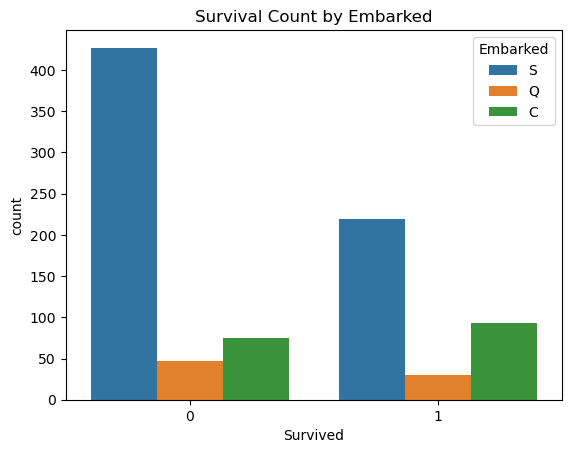

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


In [50]:
sns.countplot(data=df, x='Survived', hue='Embarked')  
plt.title('Survival Count by Embarked')  
plt.show() 

# Cross-tabulation for Embarked  
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)

* **Passengers from Cherbourg (C)** had the highest survival rate (55.4%), which may indicate a higher proportion of wealthier passengers or better access to lifeboats.

* **Passengers from Southampton (S)** had the lowest survival rate (33.9%), possibly because a higher proportion of third-class passengers boarded from there.

* **Passengers from Queenstown (Q)** had a moderate survival rate (39.0%), which is still lower than Cherbourg but higher than Southampton.

### 8. Handling Outlier
##### i. Identifying outliers:
##### a. Visualization-Based Detection:
* Box plots
* Histograms with normal distribution curve
##### b. Statistical Methods:
* Z-Score (standard deviation approach)
* IQR (Interquartile Range):
* Values below Q1−1.5×IQR
* Values above Q3+1.5×IQR.

#### 8.1. Visualize Outliers from the numerical Age column

C:\Users\smith\AppData\Local\Temp\ipykernel_10984\3472881027.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: ylabel='Age'>

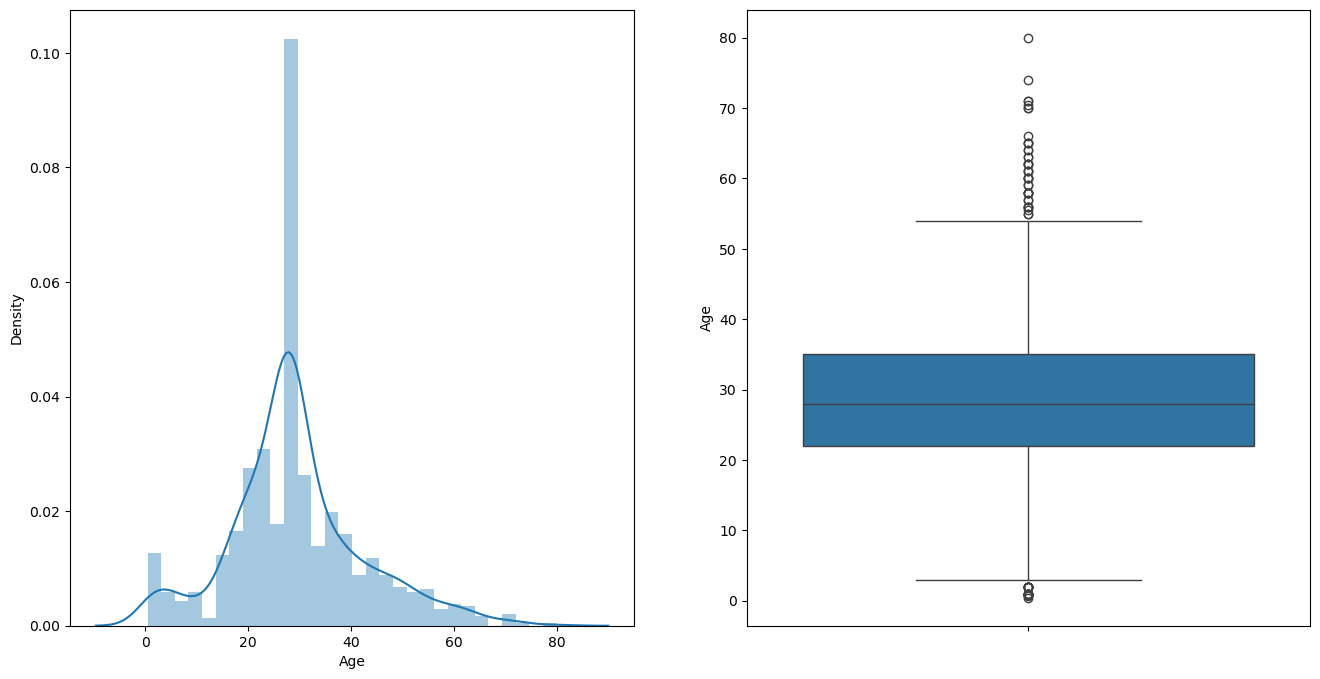

In [23]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(df['Age'])

* From the distribution or box plot, we can see that the data appears approximately normal, but there are some outliers.

In [24]:
# let me calculate inter quartile range
i25 = df['Age'].quantile(0.25)
i75 = df['Age'].quantile(0.75)
Iqr = i75 - i25
upper_limit = i75 + 1.5*Iqr
lower_limit = i25 - 1.5*Iqr

In [25]:
# generate the list of outliers from the data
df[df['Age'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,C


In [26]:
df[df['Age'] < lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S


##### Handling outlier using capping by IQR

In [27]:
new_df = df.copy()

In [62]:
new_df.shape

(769, 12)

In [28]:
new_df['Age'] = np.where(new_df['Age'] > upper_limit, upper_limit, np.where(new_df['Age'] < lower_limit, lower_limit, new_df['Age']))

In [64]:
new_df.shape

(769, 12)

In [29]:
new_df[new_df['Age'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [30]:
new_df[new_df['Age'] < lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


##### Distribution and box plot

C:\Users\smith\AppData\Local\Temp\ipykernel_10984\923345801.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Age'])


<Axes: ylabel='Age'>

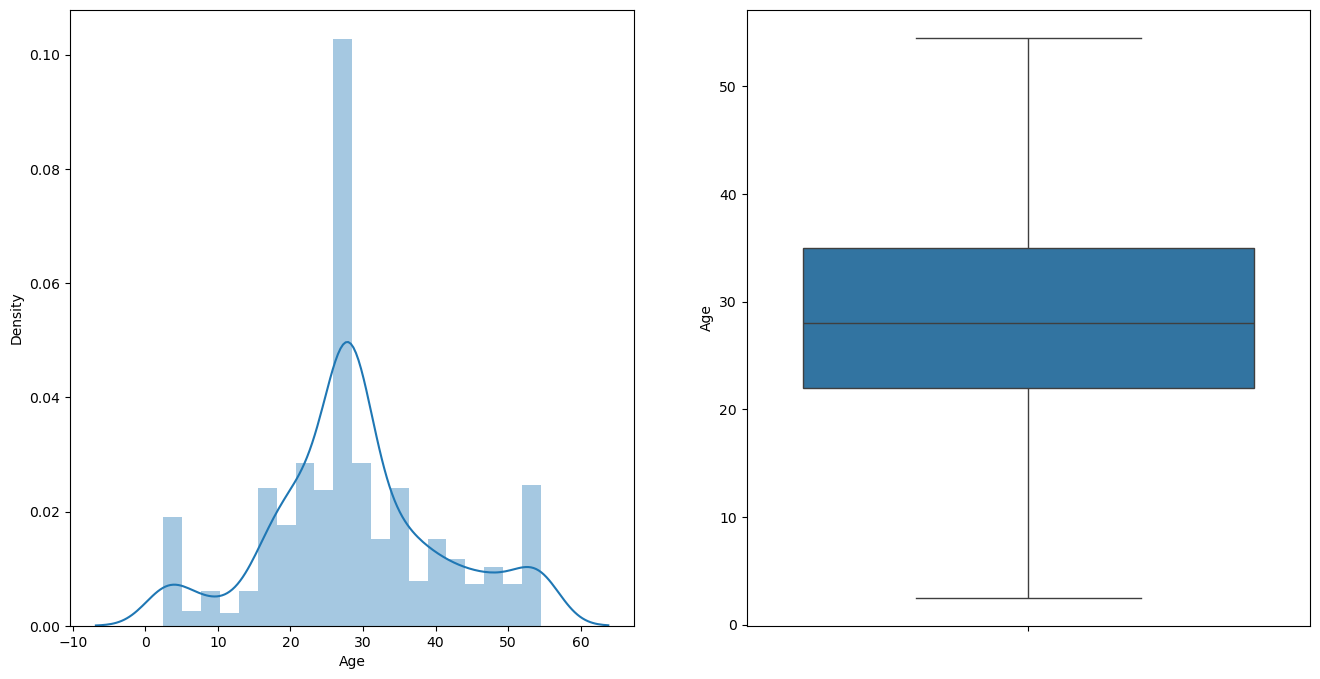

In [31]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.distplot(new_df['Age'])

plt.subplot(1,2,2)
sns.boxplot(new_df['Age'])

* After handling outliers using the capping method based on the Interquartile Range (IQR), the updated distribution and box plot show that the extreme values have been adjusted within the acceptable range. As a result, no outliers are visible in the data.

#### 8.2. Visualize Outliers from the numerical Fare column

C:\Users\smith\AppData\Local\Temp\ipykernel_10984\4116648002.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: ylabel='Fare'>

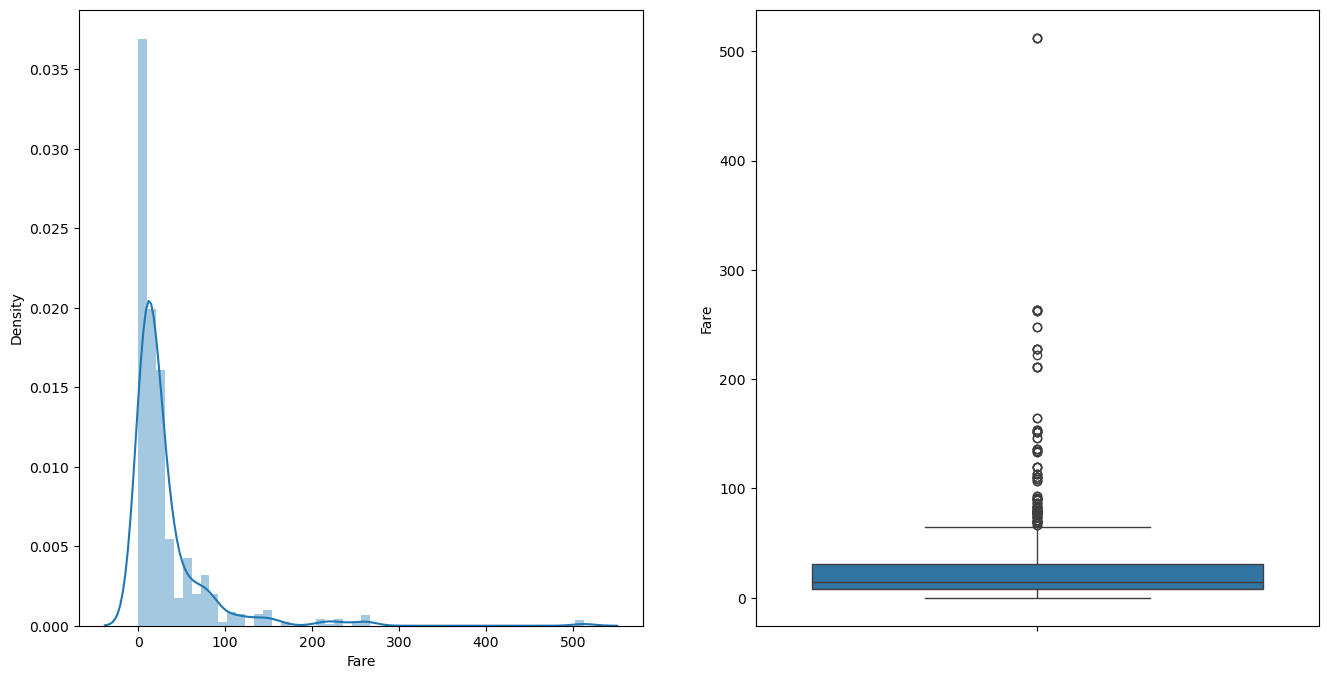

In [32]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Fare'])

plt.subplot(1,2,2)
sns.boxplot(df['Fare'])

* From the distribution or box plot, we can see that the data appears approximately normal, but there are some outliers.

In [33]:
# let me calculate inter quartile range
i25 = df['Fare'].quantile(0.25)
i75 = df['Fare'].quantile(0.75)
Iqr = i75 - i25
upper_limit = i75 + 1.5*Iqr
lower_limit = i25 - 1.5*Iqr

In [34]:
# generate the list of overfitting data
df[df['Fare'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,S


In [82]:
df[df['Fare'] > lower_limit]

In [35]:
new_df['Fare'] = np.where(new_df['Fare'] > upper_limit, upper_limit, np.where(new_df['Fare'] < lower_limit, lower_limit, new_df['Fare']))

In [36]:
new_df[new_df['Fare'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [37]:
new_df[new_df['Fare'] < lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


C:\Users\smith\AppData\Local\Temp\ipykernel_10984\3651562881.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Fare'])


<Axes: ylabel='Fare'>

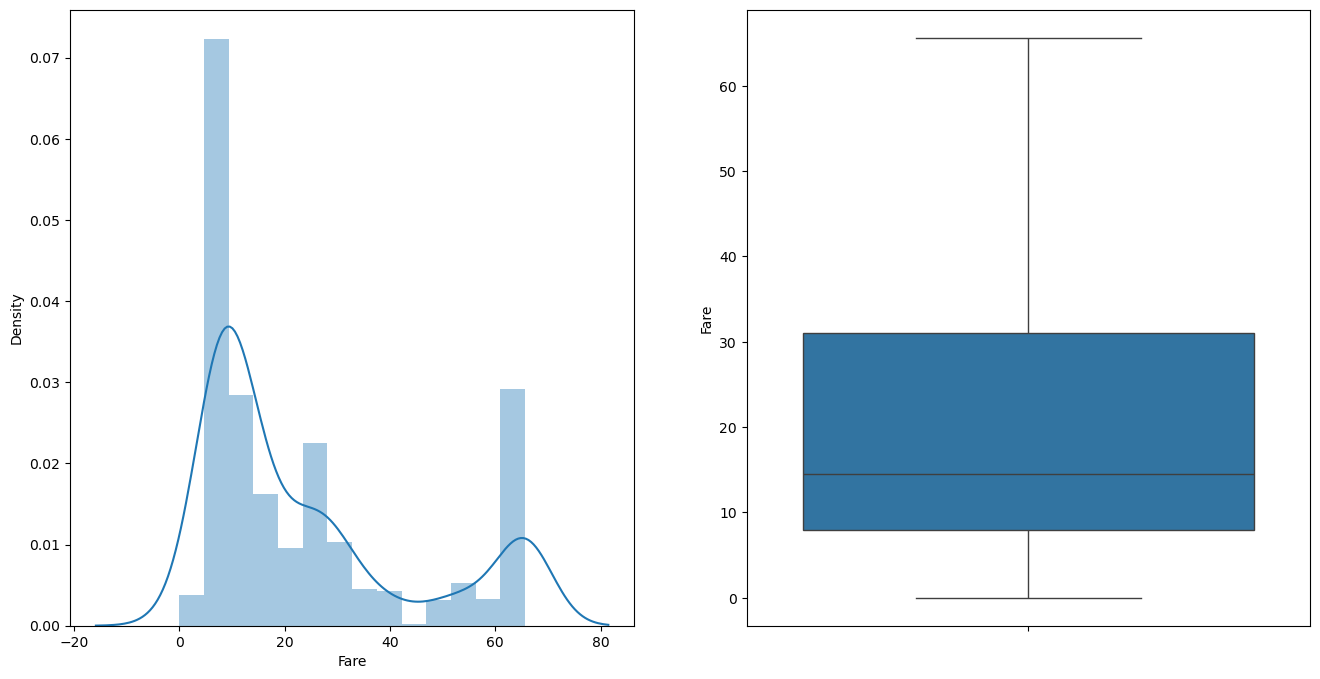

In [38]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
sns.distplot(new_df['Fare'])

plt.subplot(1,2,2)
sns.boxplot(new_df['Fare'])

* After addressing outliers in the Fare column using the capping method based on the Interquartile Range (IQR), the extreme values that fell outside the acceptable range have been adjusted. This transformation ensures that the data remains within a reasonable boundary while preserving its overall distribution. Upon visual inspection of the updated distribution plot and box plot, it is evident that the previously detected outliers have been effectively managed, and no extreme values are visible in the dataset.

#### 9. Conclusion
1. **Sex** was the most significant factor in determining survival during the Titanic incident. Females had a significantly higher survival rate compared to males, indicating that women were given priority on lifeboats, even though there were more male passengers onboard than female.

2. As shown in the exploratory data analysis (EDA) above, passengers who paid higher fares and were in first class (Pclass 1) had a higher survival rate than those who paid lower fares and were in second or third class.

3. Females and younger children were given priority on the lifeboats, as I established through a detailed EDA of the **Sex** and **Age** columns. Passengers in the 0-10 years age group had the highest survival rate.

4. Passengers who embarked from **Cherbourg** had the highest survival rate, while those who boarded from **Southampton** had the lowest survival rate. Based on the Fare column analysis, we know that the majority of passengers bought the cheapest tickets. Therefore, passengers who boarded from Southampton likely paid the least fare, which contributed to their lower survival rates. This was confirmed through a thorough investigation of the **Embarked** column.

5. People travelling with smaller families had a higher chance of surviving the accident in comparison to people with large families and travelling alone







**End**